<a href="https://colab.research.google.com/github/mayurmk311/Coder-sweek-ML/blob/master/Day%202%20Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd



# Selecting Data for Modeling
Your dataset had  too many variables to wrap your head around, or even to print out nicely.  How can you pare down this overwhelming amount of data to something you can understand?

We'll start by picking a few variables using our intuition. Later courses will show you statistical techniques to automatically prioritize variables.

To choose variables/columns, we'll need to see a list of all columns in the dataset. That is done with the **columns** property of the DataFrame (the bottom line of code below).


In [0]:
# !wget http://iali.in/datasets/Social_Network_Ads.csv To store locally

In [0]:
dataset = pd.read_csv('http://iali.in/datasets/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [0]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# iloc [ [Row_Start : Row_End] , [column_Start : Colunm_End] ]


In [0]:
#y

# Splitting Data into 2 parts
# WHY? Model might memorize our data

**Into x_train | x_test | y_train | y_test**

In [0]:
from sklearn.model_selection import train_test_split # Import train_test_split function

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test


---
# Building Your Model

You will use the **scikit-learn** library to create your models.  When coding, this library is written as **sklearn**, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames. 

The steps to building and using a model are:
* **Define:** What type of model will it be?  A decision tree?  Some other type of model? Some other parameters of the model type are specified too.
* **Fit:** Capture patterns from provided data. This is the heart of modeling.
* **Predict:** Just what it sounds like
* **Evaluate**: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

In [0]:
#lets see the  Values of Y that is predicted
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [0]:
rsqure_score = clf.score(x_test,y_test)
print('R^2: {}'.format(rsqure_score))

R^2: 0.8125


In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,1,1
4,0,0
...,...,...
75,1,1
76,0,0
77,0,0
78,0,0


In [0]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y_test,y_pred))

0.8125


In [0]:
classes=['0','1']

In [0]:
from sklearn.metrics import classification_report
classificationReport= classification_report(y_test, y_pred, target_names=classes, )
print(classificationReport)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        48
           1       0.79      0.72      0.75        32

    accuracy                           0.81        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.81      0.81      0.81        80



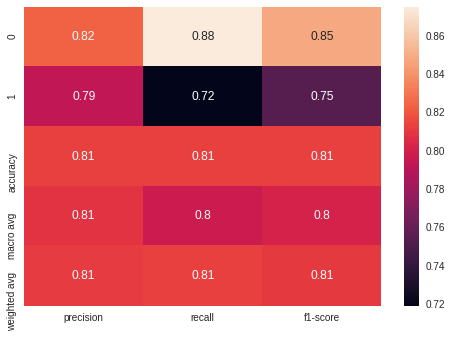

In [0]:
import seaborn as sns

classificationReport= classification_report(y_test, y_pred, target_names=classes, output_dict=True)

sns.heatmap(pd.DataFrame(classificationReport).iloc[:-1, :].T, annot=True)


# Let's see the Confusion Matrix

Confusion matrix, without normalization
[[42  6]
 [ 9 23]]
Normalized confusion matrix
[[0.875   0.125  ]
 [0.28125 0.71875]]


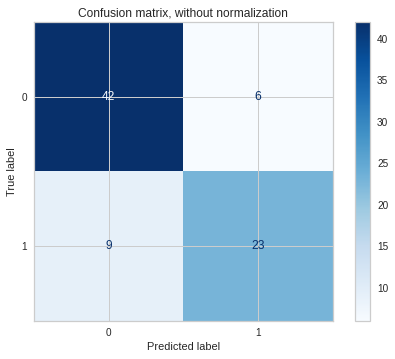

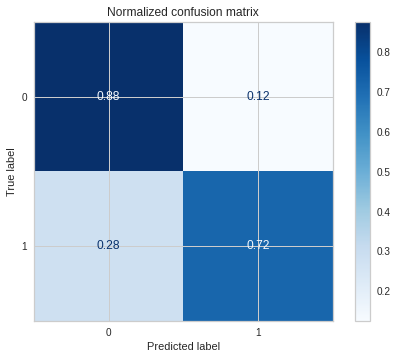

In [0]:
from sklearn.metrics import plot_confusion_matrix

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=classes,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

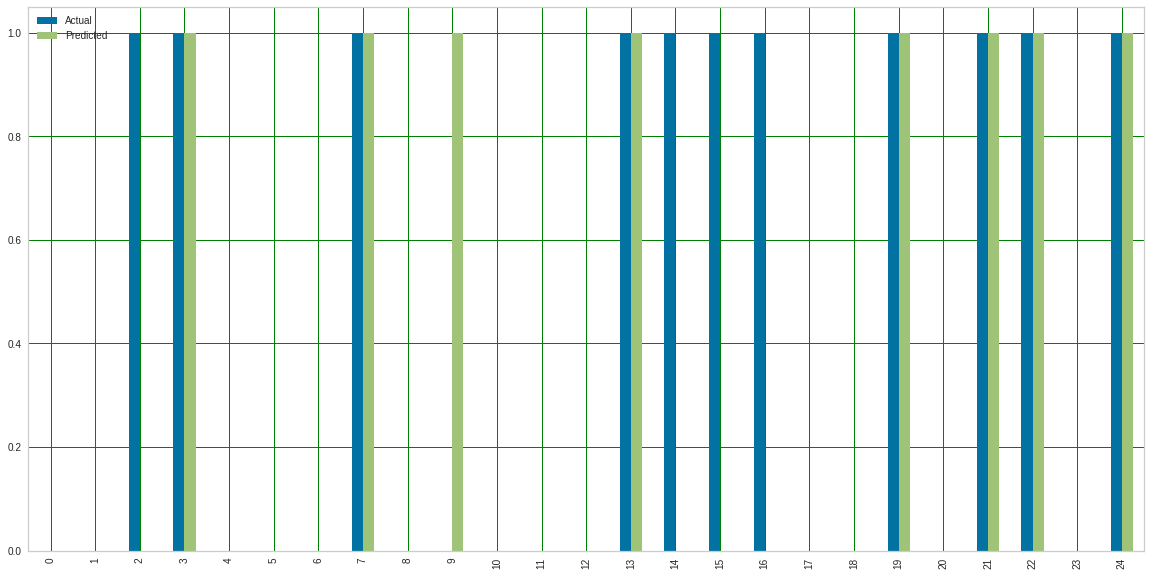

In [0]:
import matplotlib.pyplot as plt  

df1 = df.head(25)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

# What's the Problem?


1.   **Need more data:** We need to have a huge amount of data to get the best possible prediction.

2.   **Poor features:** The features we used may not have had a high enough correlation to the values we were trying to predict.

3.   **Bad assumptions:** We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.



# Let's Try using better models

# Theory of SVM

**Tuning Hyperparameters**


**Kernel**: The main function of the kernel is to transform the given dataset input data into the required form. There are various types of functions such as linear, polynomial, and radial basis function (RBF). Polynomial and RBF are useful for non-linear hyperplane. Polynomial and RBF kernels compute the separation line in the higher dimension. In some of the applications, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear. This transformation can lead to more accurate classifiers.

**Regularization**: Regularization parameter in python's Scikit-learn C parameter used to maintain regularization. Here C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimization how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term. A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane.

**Gamma**: A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting. In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line.

**Advantages**
SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.

**Disadvantages**
SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.



In [0]:
import sklearn.svm
from sklearn import svm

model = svm.SVC(kernel='linear') #convert non seperable problem to seperable
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = model.predict(x_test)
y_predict


array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [0]:
from sklearn.metrics import accuracy_score

print (accuracy_score(y_test,y_predict))

0.8375


In [0]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        48
           1       0.81      0.78      0.79        32

    accuracy                           0.84        80
   macro avg       0.83      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80



In [0]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
75,1,1
76,0,0
77,0,0
78,0,0


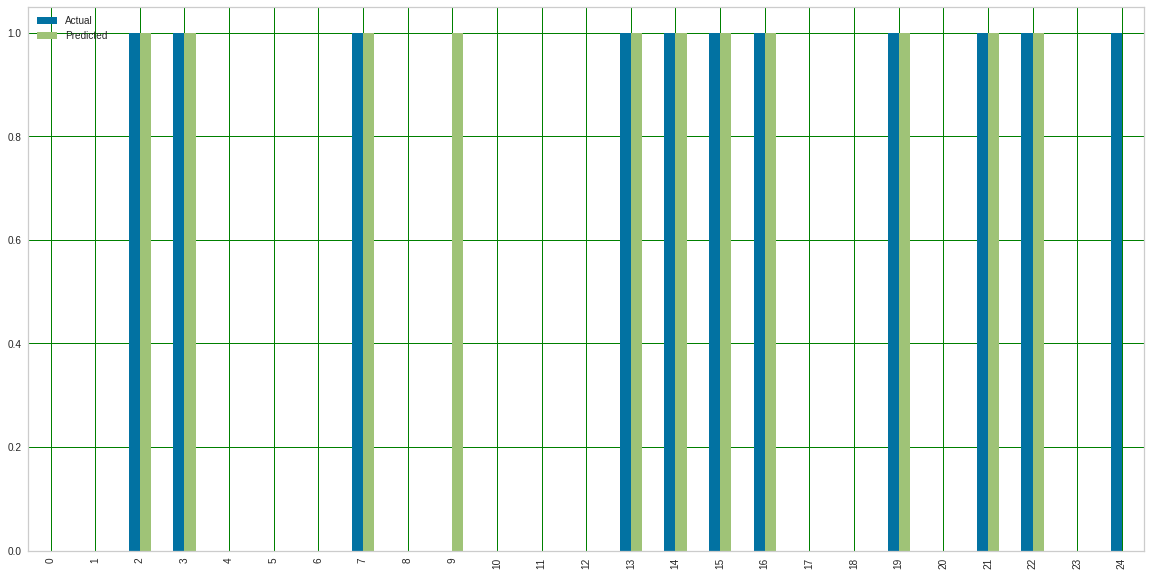

In [0]:
import matplotlib.pyplot as plt  

df1 = df.head(25)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

# More Ways to improve?



1.   Feature Engineering
2.   Pre-processing
3.   Hyper parameter tunning

